# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [1]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

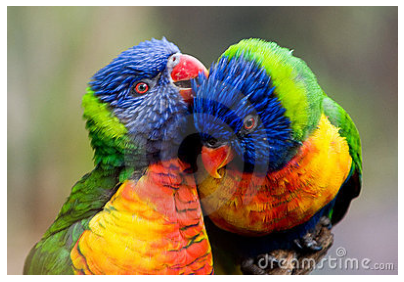

In [2]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [5]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей
X = img.reshape(-1, 3)
X.shape

(275, 400, 3)


(110000, 3)

In [8]:
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import KMeans

SSIM: 0.5334527536159214


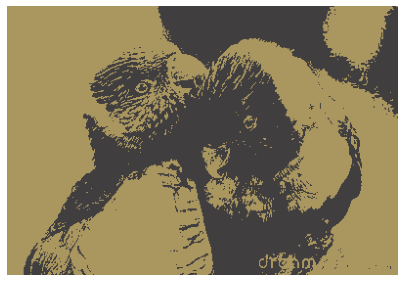

SSIM: 0.5636032852757049


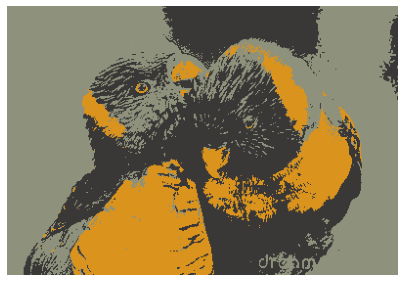

SSIM: 0.6782911804006556


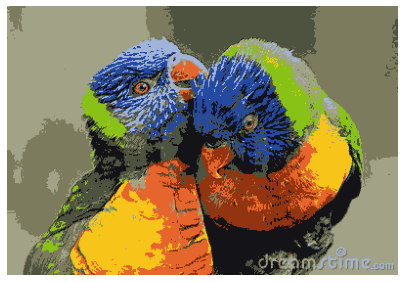

SSIM: 0.761097959736186


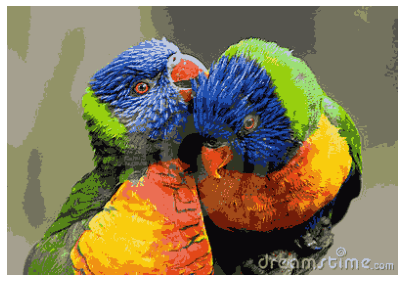

In [10]:
#k-means
clusters = [2, 3, 10, 20]
ssim_value = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster)
    y_pred = kmeans.fit_predict(X)
    
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    image = centers[labels].reshape(275, 400, 3).astype('u1')
    print("SSIM:", ssim(img, image, channel_axis=2))
    ssim_value.append(ssim(img, image, channel_axis=2))
    draw_picture(image)

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

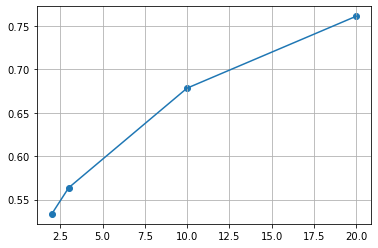

In [16]:
fig = plt.scatter(clusters, ssim_value)
fig = plt.plot(clusters, ssim_value)
fig = plt.grid()

Как видим по графику, при увеличении количества кластеров увеличивается четкость картинки и таке растет метрика

0.08845215736657112


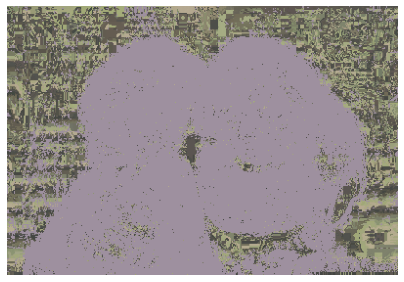

0.09773836693170716


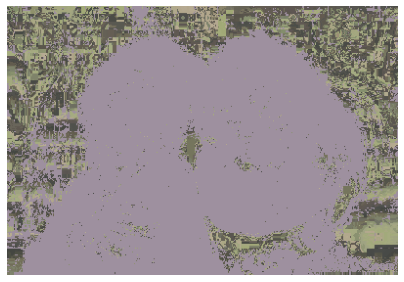

0.10353648647946906


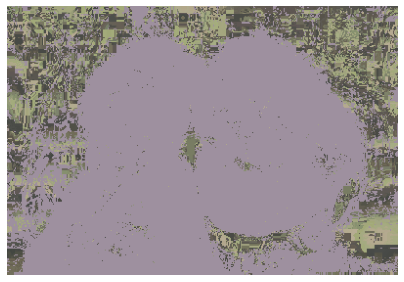

0.11348465889466851


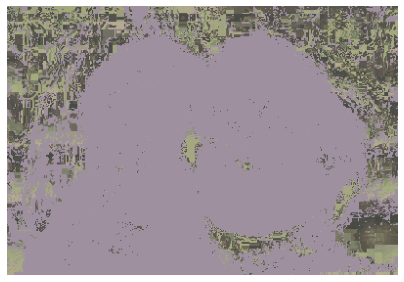

0.08845215736657112


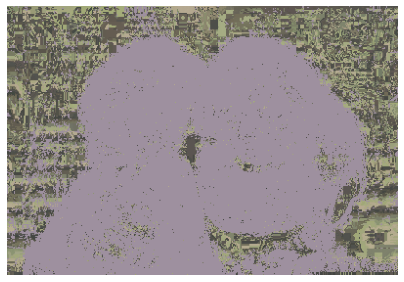

0.09773836693170716


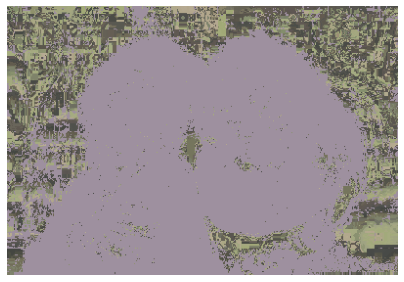

0.10353648647946906


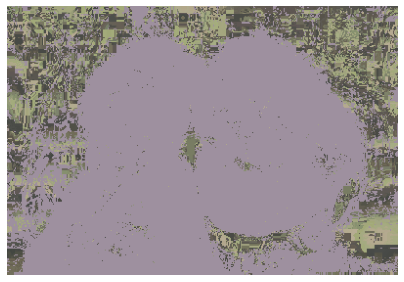

0.11348465889466851


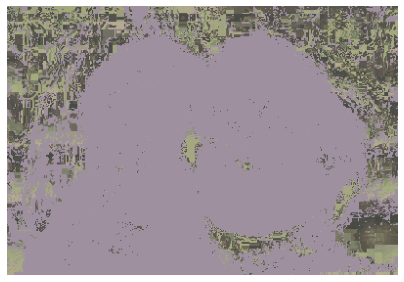

0.08845215736657112


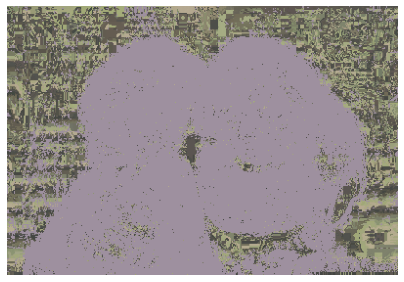

0.09773836693170716


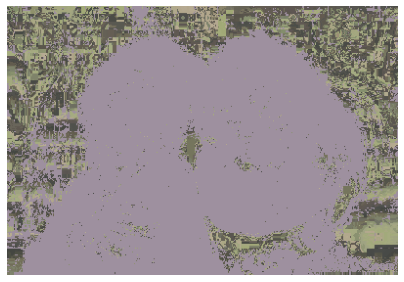

0.10353648647946906


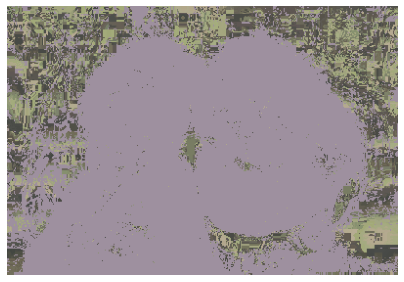

0.11348465889466851


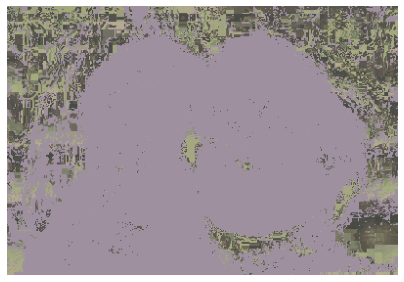

0.08845215736657112


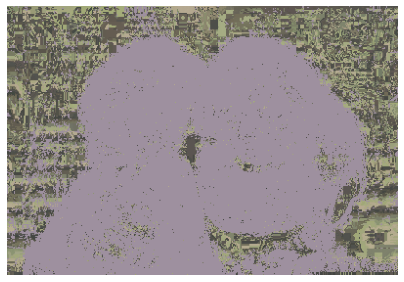

0.09773836693170716


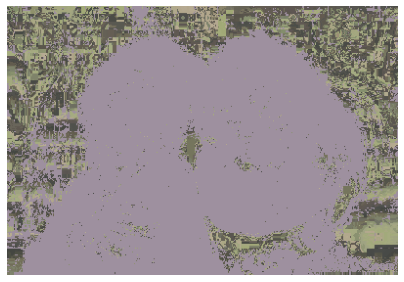

0.10353648647946906


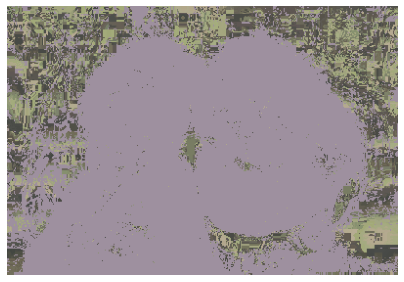

0.11348465889466851


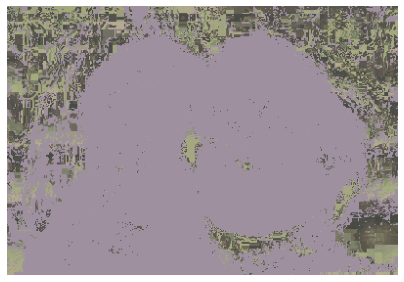

In [19]:
#dbscan
from sklearn.cluster import DBSCAN
import numpy as np

eps = np.arange(0.2, 0.6, 0.1)
samples = np.arange(3, 7)

for eps in eps:
    for n_samples in samples:
        dbscan = DBSCAN(eps=eps, min_samples=n_samples)
        y_pred = dbscan.fit_predict(X)

        centers = dbscan.components_
        labels = dbscan.labels_

        image = centers[labels].reshape(275, 400, 3).astype('u1')
        print(ssim(img, image, channel_axis=2))
        draw_picture(image)

Мы перебрали несколько параметров, но, как видим, нифига лучше ничего не становилось - DBSCAN выдает плохие результаты

In [23]:
img.shape
#из-за того, что аггломеративка не даст обработать такую фотку, ресайзнем ее

(275, 400, 3)

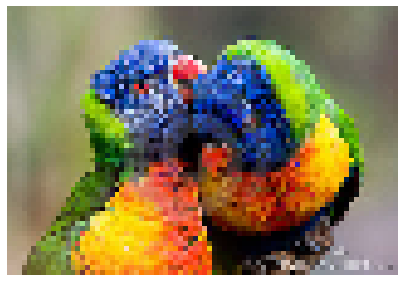

(4400, 3)

In [37]:
resized = cv2.resize(img, dsize=(16, 11))
draw_picture(resized)

X_resized = resized.reshape(-1, 3)
X_resized.shape

In [39]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

clusters = [2, 3, 10, 20]
ssim_value = []

for cluster in clusters:
    agg = AgglomerativeClustering(n_clusters=cluster, linkage='average')
    y_pred = agg.fit_predict(X)

    ncl = NearestCentroid()
    ncl.fit(X, y_pred)

    centers = ncl.centroids_
    labels = agg.labels_

    image = centers[labels].reshape(11, 16, 3).astype('u1')
    print("SSIM:", ssim(resized, image, channel_axis=2))
    draw_picture(pic)

MemoryError: Unable to allocate 45.1 GiB for an array with shape (6049945000,) and data type float64

Ясно, я иду нахер

Я урезал кач-во картинки и так в нулину - а оно все равно не запускается

Ребят, я пытался - ну по коду оно должно работать, а по здравому смыслу нет(

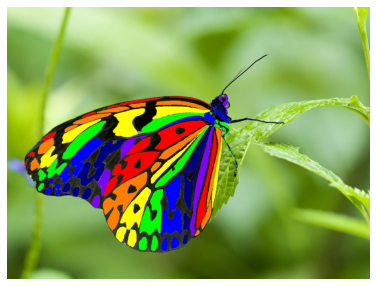

In [41]:
#Займемся теперь своей картинкой
an_img = cv2.imread('butterfly.jpg') # считать картинку
draw_picture(an_img) # нарисовать картинку

In [43]:
an_img.shape #мне кажется, что это будет по кд просто падать...

(1200, 1600, 3)

In [45]:
X = an_img.reshape(-1, 3)
X.shape

(1920000, 3)

SSIM: 0.7104179166868031


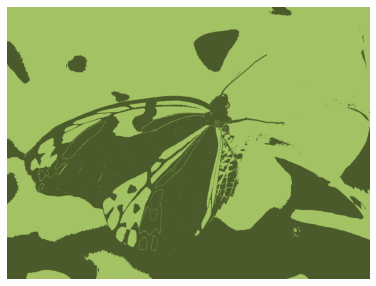

SSIM: 0.7287675726528601


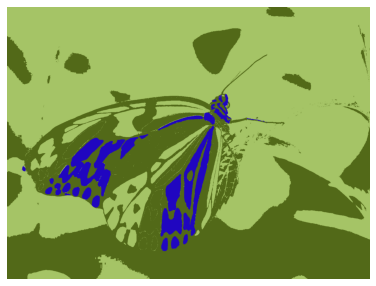

SSIM: 0.7769429980305683


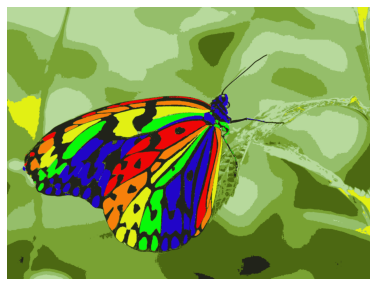

SSIM: 0.8144306239997037


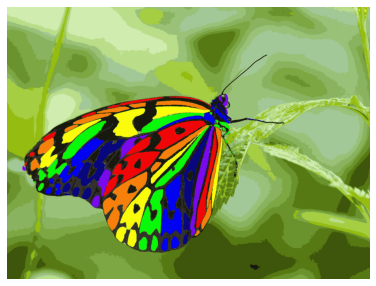

SSIM: 0.8669914445239671


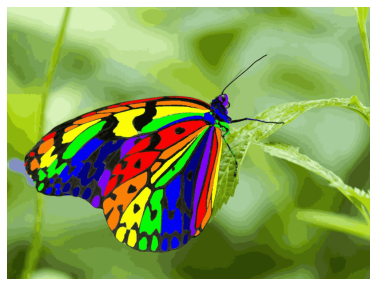

SSIM: 0.9049128594337933


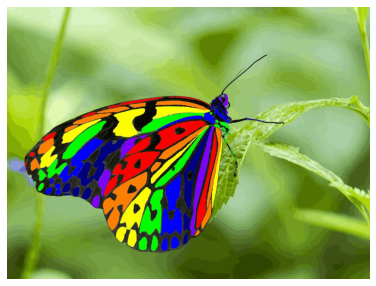

In [48]:
#k-means
clusters = [2, 3, 10, 20, 50, 100]
ssim_value = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster)
    y_pred = kmeans.fit_predict(X)
    
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    image = centers[labels].reshape(1200, 1600, 3).astype('u1')
    print("SSIM:", ssim(an_img, image, channel_axis=2))
    ssim_value.append(ssim(an_img, image, channel_axis=2))
    draw_picture(image)

Не совсем понимаю. почему уже даже на 2 кластерах были такие хорошие показатели на самом деле, но на 100 кластерах картинка даже почти не отличается от изначальной - посмотрим на график

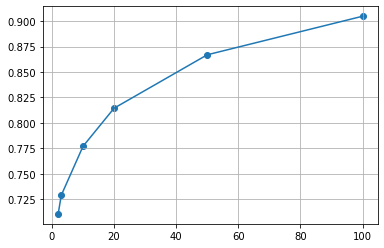

In [49]:
fig = plt.scatter(clusters, ssim_value)
fig = plt.plot(clusters, ssim_value)
fig = plt.grid()

Да, чем больше кол- во кластеров, тем больше похожа картинка на исходную и тем выше метрика SSIM

In [68]:
resize = cv2.resize(an_img, dsize=(200, 150))
an_img = cv2.resize(an_img, dsize=(200, 150))

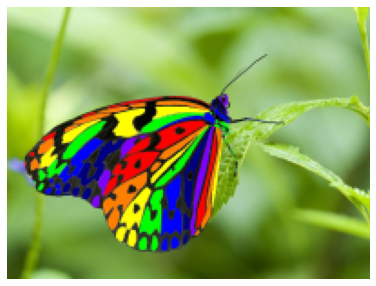

In [69]:
draw_picture(resize)

In [70]:
an_img.shape

(150, 200, 3)

In [71]:
X = resize.reshape(-1, 3)
X.shape

(30000, 3)

In [72]:
#dbscan
from sklearn.cluster import DBSCAN
import numpy as np

eps = np.arange(0.1, 5.2, 0.5)
samples = np.arange(3, 15)

best_param_eps = 0
best_param_samnles = 0
best_ssim = 0

for eps in eps:
    for n_samples in samples:
        dbscan = DBSCAN(eps=eps, min_samples=n_samples)
        y_pred = dbscan.fit_predict(X)

        centers = dbscan.components_
        labels = dbscan.labels_

        image = centers[labels].reshape(150, 200, 3).astype('u1')
        print(ssim(an_img, image, channel_axis=2))
        
        if ssim(an_img, image, channel_axis=2) > best_ssim:
            best_ssim = ssim(an_img, image, channel_axis=2)
            best_param_eps = eps
            best_param_samnles = n_samples
            
        #draw_picture(image)

0.05086174467124405
0.06748455245111605
0.08330554689493197
0.15150591890490725
0.17507973041166225
0.19318606953360143
0.1436989047526347
0.152573957193557
0.1572785929310365
0.16481578470272668
0.1744264555351626
0.18068037305122744
0.05086174467124405
0.06748455245111605
0.08330554689493197
0.15150591890490725
0.17507973041166225
0.19318606953360143
0.1436989047526347
0.152573957193557
0.1572785929310365
0.16481578470272668
0.1744264555351626
0.18068037305122744
0.05267770377982609
0.06893217318225871
0.05909659666003956
0.06538366419310304
0.083990615844425
0.09696643935984232
0.1018755497986158
0.11569444615081526
0.12724067884297405
0.13792870435476334
0.1432044101676112
0.14207164254781077
0.1296550377121386
0.11114437178284407
0.10095539102659995
0.09150373499291686
0.08466805565138917
0.09057256994911296
0.09321654100135994
0.09493833976275241
0.10325976757731643
0.10272015274058861
0.10267958347541344
0.09958064956991482
0.2193669937528532
0.19720699624436766
0.18507933606773

In [73]:
print(best_ssim,best_param_eps,best_param_samnles)

0.3111958152204764 5.1 10


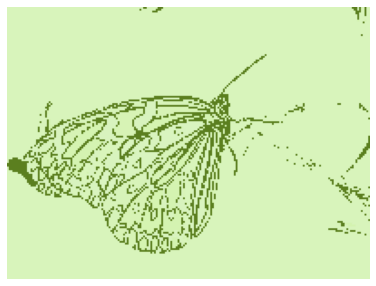

In [74]:
dbscan = DBSCAN(eps=best_param_eps, min_samples=best_param_samnles)
y_pred = dbscan.fit_predict(X)

centers = dbscan.components_
labels = dbscan.labels_

image = centers[labels].reshape(150, 200, 3).astype('u1')
draw_picture(image)

Тут DBSCAN показал аж 0,31 и что-то вообще не похожее на исходную картинку....В общем, этот алгос точно не создан для преобразования палитры 

SSIM: 0.3722109310480033


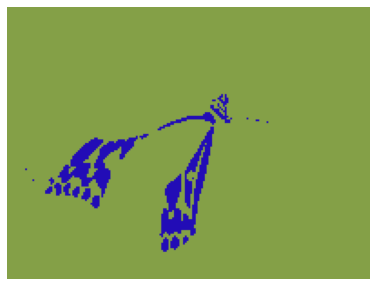

SSIM: 0.40417567419850237


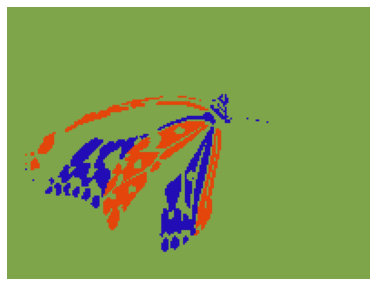

SSIM: 0.5839929585499484


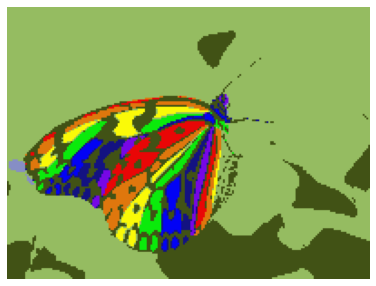

SSIM: 0.6940462404915672


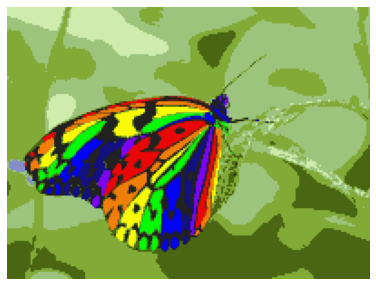

In [76]:
clusters = [2, 3, 10, 20]
ssim_value = []

for cluster in clusters:
    agg = AgglomerativeClustering(n_clusters=cluster, linkage='average')
    y_pred = agg.fit_predict(X)

    ncl = NearestCentroid()
    ncl.fit(X, y_pred)

    centers = ncl.centroids_
    labels = agg.labels_

    image = centers[labels].reshape(150, 200, 3).astype('u1')
    print("SSIM:", ssim(an_img, image, channel_axis=2))
    draw_picture(image)

Зато здесь аггломеративная кластеризация запустилась...ну хоть что-то ладно
Вывод - на наших картинках можно сказать, что k-mеans имба и справляется лучше всех с данной задачей

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [77]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [78]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [80]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [81]:
y.shape

(2370,)

In [82]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

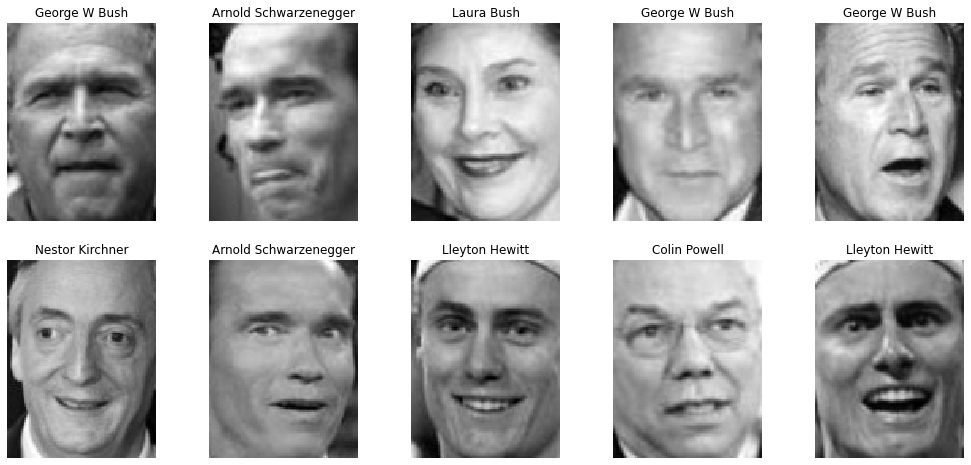

In [83]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

Зачем делать конст предсказатель самому, если за нас это могут сделать КАСКАДЕРЫ!

In [106]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train);
y_pred_dummy = dummy.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_dummy) #все даже еще не совсем так ужасно, как я думал

0.23839662447257384

In [101]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

n_components = np.arange(2, 303, 10)
acc_logreg = []
acc_rf = []
for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    log_reg = LogisticRegression().fit(X_train_pca, y_train)
    y_pred_log_reg = log_reg.predict(X_test_pca)
    acc_logreg.append(accuracy_score(y_test, y_pred_log_reg))

    rf = RandomForestClassifier().fit(X_train_pca, y_train)
    y_pred_rf = rf.predict(X_test_pca)
    acc_rf.append(accuracy_score(y_test, y_pred_rf))

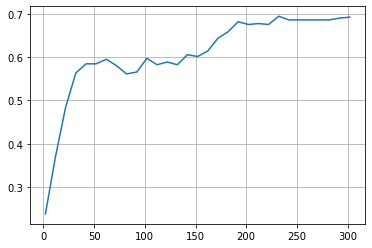

In [102]:
plt.plot(n_components, acc_logreg)
plt.grid()

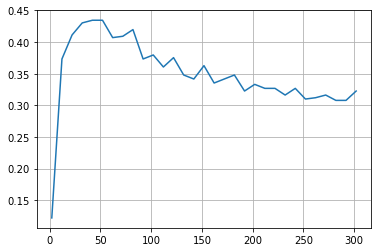

In [103]:
plt.plot(n_components, acc_rf)
plt.grid()

Забавно - лес очень сильно проигрывает лог регу в данной задаче - но я не понимаю почему

In [105]:
acc_logreg = np.array(acc_logreg)
best_n_comps = n_components[acc_logreg.argmax()]
best_n_comps

232

In [109]:
pca = PCA(n_components=best_n_comps)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

log_reg_b = LogisticRegression().fit(X_train_pca, y_train)

y_pred_log_reg_b = log_reg_b.predict(X_test_pca)


print("Accuracy of the log reg:", accuracy_score(y_test, y_pred_log_reg_b))
print("Accuracy of the dummy:", accuracy_score(y_test, y_pred_dummy))

Accuracy of the log reg: 0.6729957805907173
Accuracy of the dummy: 0.23839662447257384


Почему я взял PCA, а не tSNE?
1. слишком большое кол-во признаков - уменьшение до 2-3 в нашем случае может дать плохой результат
2. этого достаточно

Но tSNE красиво все это отрисует, поэтому предскажем на PCA, а рисовашки устроим на tSNE

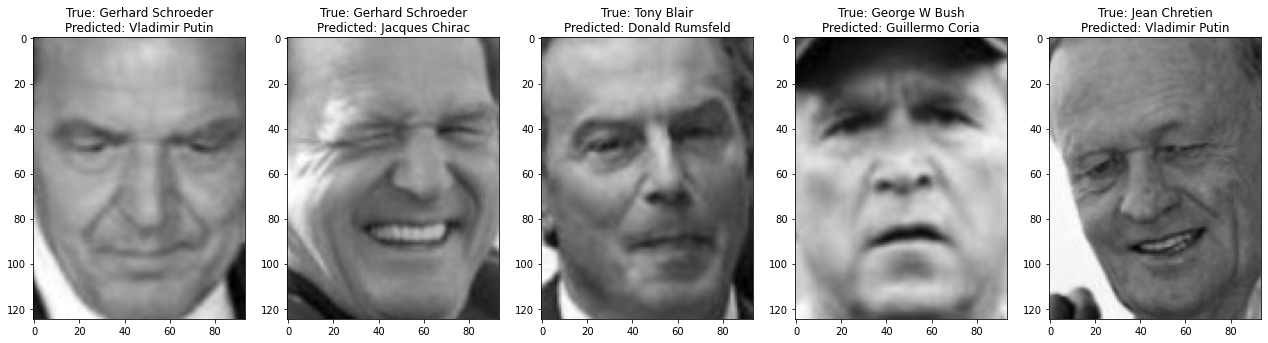

In [146]:
_, axs = plt.subplots(1,5, figsize=(22,8))
for k, ax in enumerate(axs.reshape(-1)):
    ax.imshow(255-X_test[y_test!=y_pred_log_reg_b][k,:].reshape(125,-1), cmap=plt.cm.gray_r)
    ax.set_title('True: ' + names[y_test[y_test!=y_pred_log_reg_b][k]] + 
                    '\n'+'Predicted: ' + names[y_pred_log_reg_b[y_test!=y_pred_log_reg_b][k]])

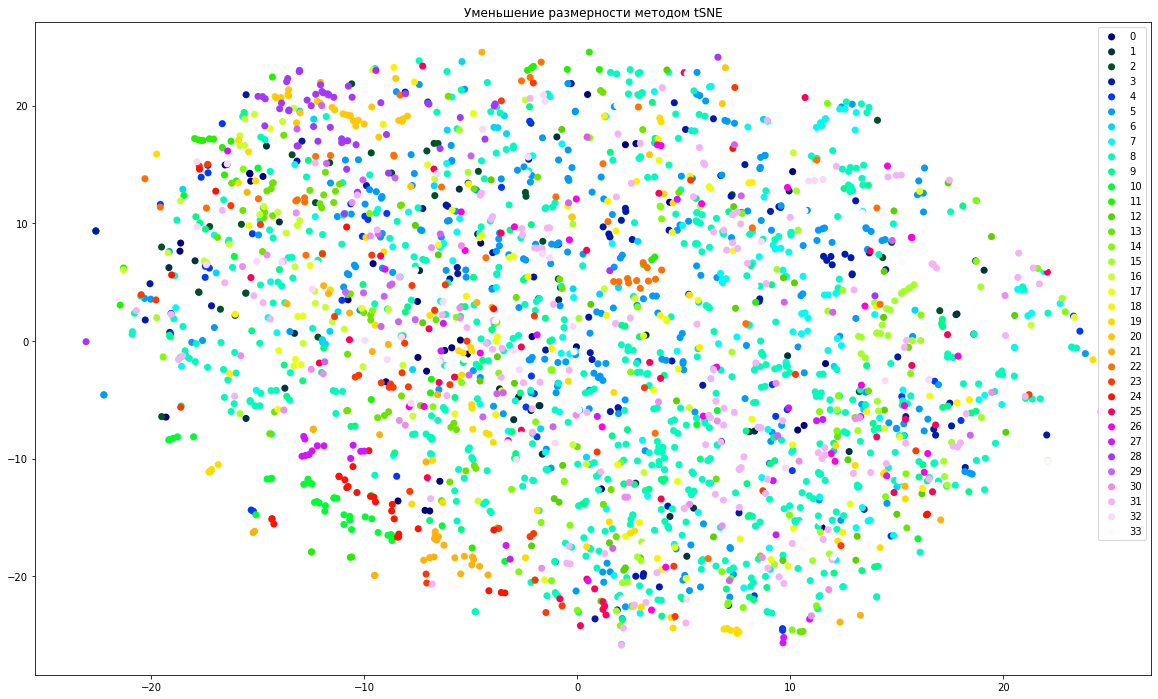

In [157]:
from matplotlib.colors import Normalize
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=400)

X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(34):
    norm = Normalize(vmin=0, vmax=33)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=[color] * len(X_tsne_2[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title("Уменьшение размерности методом tSNE")
plt.legend()

Нельзя выделить какой-то адын конкретный кластер, тут все разбросано по всей плоскости. Некрасиво, но есть